In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
# sys.path.append('/Users/user/PythonProjects/SpyDust/')

from SpyDust.Grain import *

## Grain size and shape distribution

In [14]:
grain_obj = grain_distribution()
f_a_beta = grain_obj.shape_and_size_dist(6, a_weighted=True, normalize=True)
a_tab = grain_obj.a_tab
beta_tab = grain_obj.beta_tab


/var/folders/n6/tr4cmwxn5436s2wl6n6vtj240000gp/T/ipykernel_28575/2449709581.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/n6/tr4cmwxn5436s2wl6n6vtj240000gp/T/ipykernel_28575/2449709581.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


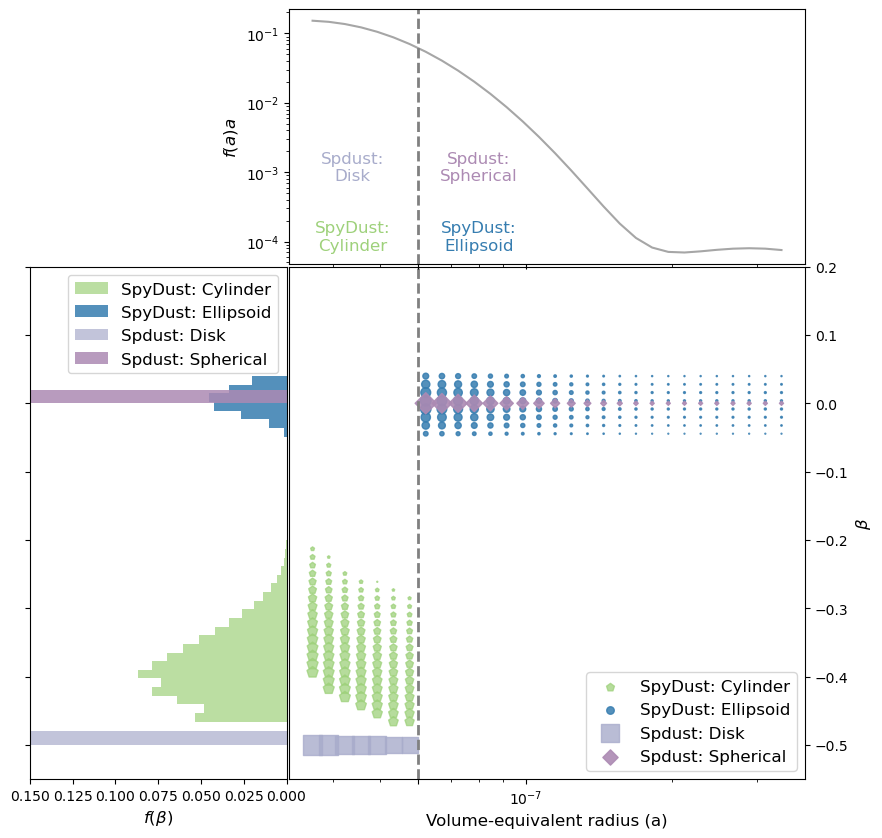

In [15]:
def visualize_shape_size_dist(data, a_tab, beta_tab):

    prob_values = data.flatten()
    a_dist = np.sum(data, axis=1)
    a_values, beta_values = np.meshgrid(a_tab, beta_tab, indexing='ij')
    a_values = a_values.flatten()
    beta_values = beta_values.flatten()
    b_tab_aux = np.zeros_like(a_tab)
    b_tab_aux[a_tab < 6e-8] = -0.5

    ind = a_values < 6e-8
    ind_aux = a_tab < 6e-8
    
    # Create a GridSpec layout
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(3, 3, wspace=0.01, hspace=0.01)

    # Main plot: joint distribution as a heatmap-like scatter plot
    ax_main = fig.add_subplot(gs[1:3, 1:3])
    
    scatter = ax_main.scatter(a_values[ind], beta_values[ind], c='#9ED17B',  s=500 * np.sqrt(prob_values[ind]), alpha=0.75, label=r'SpyDust: Cylinder', marker='p')
    scatter = ax_main.scatter(a_values[~ind], beta_values[~ind], c='#367DB0',  s=500 * np.sqrt(prob_values[~ind]), alpha=0.85, label=r'SpyDust: Ellipsoid', marker='o')
    ax_main.set_xscale('log')  # Log scale for 'a' axis
    ax_main.set_xlabel('Volume-equivalent radius (a)', fontsize=12)
    ax_main.set_ylabel(r'$\beta$', fontsize=12)
    ax_main.set_ylim(-0.55, 0.2)  # Set the range of beta values
    

    # Move y-axis label for the main plot to the right
    ax_main.yaxis.set_label_position("right")
    ax_main.yaxis.tick_right()

    # Add the vertical line at a = 6e-8 in the main plot
    a_line_threshold = 6e-8
    ax_main.axvline(a_line_threshold, color='gray', linestyle='--', linewidth=2)

    # Add the tick at a = 6e-8
    xticks = list(ax_main.get_xticks())  # Get current x-ticks
    xticks.append(a_line_threshold)  # Add the desired a = 6e-8 tick
    ax_main.set_xticks(xticks)  # Set the new list of x-ticks
    #ax_main.set_xticklabels([f'{tick:.1e}' for tick in xticks])  # Format x-ticks in scientific notation
    

    # Marginal distribution for 'a' (top plot) with equal width to the main plot
    ax_top = fig.add_subplot(gs[0, 1:3], sharex=ax_main)
    a_unique = np.unique(a_values)
    prob_a = [np.sum(prob_values[a_values == a]) for a in a_unique]
    ax_top.plot(a_unique, prob_a, color='gray', alpha=0.7)
    ax_top.set_ylabel(r'$f(a)a$', fontsize=12)
    ax_top.set_yscale('log')  # Log scale for the marginal plot
    ax_top.xaxis.set_tick_params(labelbottom=False)

    # Add the vertical line at a = 6e-8 in the marginal plot for f(a)
    a_line_threshold = 6e-8
    ax_top.axvline(a_line_threshold, color='gray', linestyle='--', linewidth=2)

    # Add text labels for spdust models on both sides of the vertical line
    ax_top.text(4.4e-8, np.max(prob_a) * 0.005, "Spdust:\nDisk",
                fontsize=12, color='#A8ACCB', ha='center')

    ax_top.text(4.4e-8, np.max(prob_a) * 0.0005, "SpyDust:\nCylinder",
                fontsize=12, color='#9ED17B', ha='center')

    ax_top.text(8e-8, np.max(prob_a) * 0.005, "Spdust:\nSpherical",
                fontsize=12, color='#AC8AB3', ha='center')
    
    ax_top.text(8e-8, np.max(prob_a) * 0.0005, "SpyDust:\nEllipsoid",
                fontsize=12, color='#367DB0', ha='center')

    # Marginal distribution for 'beta' (left plot), flip orientation
    ax_left = fig.add_subplot(gs[1:3, 0], sharey=ax_main)
    ax_left.hist(beta_values[ind], bins=40, orientation='horizontal', color='#9ED17B', alpha=0.7, weights=prob_values[ind], label='SpyDust: Cylinder')
    ax_left.hist(beta_values[~ind], bins=40, orientation='horizontal', color='#367DB0', alpha=0.85, weights=prob_values[~ind], label='SpyDust: Ellipsoid')
    ax_left.hist(b_tab_aux[ind_aux], bins=50, orientation='horizontal', color='#A8ACCB', alpha=0.7, weights=a_dist[ind_aux], label='Spdust: Disk')
    ax_left.hist(b_tab_aux[~ind_aux], bins=50, orientation='horizontal', color='#AC8AB3', alpha=0.85, weights=a_dist[~ind_aux], label='Spdust: Spherical')
    ax_left.set_xlabel(r'$f(\beta)$', fontsize=12)
    ax_left.invert_xaxis()  # Flip the x-axis of the left panel
    ax_left.set_xlim(0.15,0)  # Set the range of beta values
    ax_left.yaxis.set_tick_params(labelleft=False)
    ax_left.legend( fontsize=12)

    # Add colorbar to the figure instead of the subplot to align the top and main panel widths
    #cbar = fig.colorbar(scatter, ax=ax_main, fraction=0.05, pad=0.04)
    # cbar.set_label('Probability')

    # Plot the two-segment line
    a_line_1 = np.linspace(a_tab.min(), 6e-8, 100)
    a_line_2 = np.linspace(6e-8, a_tab.max(), 100)
    #beta_line_1 = -0.5 * np.ones_like(a_line_1)  # beta = -1/2 for a < 6e-8
    #beta_line_2 = np.zeros_like(a_line_2)        # beta = 0 for a >= 6e-8

    
    scatter = ax_main.scatter(a_tab[ind_aux], b_tab_aux[ind_aux], c='#A8ACCB',  s=500 * np.sqrt(a_dist[ind_aux]), alpha=0.8, label=r'Spdust: Disk', marker='s')
    scatter = ax_main.scatter(a_tab[~ind_aux], b_tab_aux[~ind_aux], c='#AC8AB3',  s=500 * np.sqrt(a_dist[~ind_aux]), alpha=0.9, label=r'Spdust: Spherical', marker='D')

    # First part of the line: beta = -1/2
    #ax_main.plot(a_line_1, beta_line_1, color='#A8ACCB', linewidth=2, solid_capstyle='round', label = 'Spdust: Disk')

    # Second part of the line: beta = 0
    #ax_main.plot(a_line_2, beta_line_2, color='#AC8AB3', linewidth=2, linestyle='--', label = 'Spdust: Spherical')

    ax_main.legend(loc='lower right', fontsize=12)

    #plt.suptitle('Joint Distribution with Marginals for a and beta (Log-scale for a)')
    plt.tight_layout()
    #plt.xticks(fontsize=13)
    #plt.yticks(fontsize=13)

visualize_shape_size_dist(f_a_beta, a_tab, beta_tab)
plt.tight_layout()
plt.savefig('figures/shape_size_dist.pdf')

### Correction of the dipole radiation backreaction

### Correction of the plasma drag

## An example of the angular momentum distribution: 
### $f(\Omega|a, \beta, \mu)$  (given grain properties)

In [ ]:
DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

In [ ]:
from SpyDust.util import cgsconst

debye = cgsconst.debye

dip_per_at = WNM_params['dipole'] / np.sqrt(N_C(1e-7) + N_H(1e-7)) * debye

aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmax(f_a_beta[aind, :])]
print(a, beta)

In [ ]:
from SpyDust.AngMomDist import log_f_rot
from SpyDust.charge_dist import charge_dist

fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
mu_ip = np.array([mu_rms * np.sqrt(ip)])
mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
f_Omega_1 = log_f_rot(env, a, beta, fZ, mu_ip*0.1, mu_op*10, omega_min=1e7, omega_max=3e13, Nomega=1000) 
#omega2, f_Omega_2 = f_rot_old(env, a, beta, fZ, mu_ip, mu_op, mu_op, omega_min=1e7, omega_max=3e12, Nomega=1000)
#plt.loglog(omega2, f_Omega_2[0], label='Old')

omegas = makelogtab(1e7, 3e13, 1000)

plt.plot(omegas, f_Omega_1[0], linestyle='--')
plt.xscale('log')
plt.ylabel(r'$\log f(\Omega)$')
plt.xlabel(r'$\Omega$')
plt.ylim(1e-60, 1e-10)

## Multiply with dipole, marginalize over dipole: 
### $\tilde{f}_\perp(\Omega | a, \beta) \equiv  \int \mu_\perp^2 f(\Omega, \boldsymbol{\mu} | a, \beta ) \mathrm{d}^3\mu$

In [ ]:
from SpyDust.SED import mu2_f_cond, mu2_f, SED
aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmin(f_a_beta[aind, :])]
print(a, beta)

fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
mu_ip = np.array([mu_rms * np.sqrt(ip)])
mu_op = np.array([mu_rms * np.sqrt(1 - ip)])

mu2_f_cond_1, mu2_f_cond_2 = mu2_f_cond(env, a, beta, fZ, mu_rms, ip, 10, omega_min=1e8, omega_max=1e13, Nomega=1000)

omega = makelogtab(1e8, 1e12, 1000)
plt.loglog(omega, mu2_f_cond_1, label='ip')
plt.loglog(omega, mu2_f_cond_2, label='op', linestyle='--')

## Further marginalize the grain size
### $\tilde{f}_\perp(\Omega, \beta) = \int \mathrm{d}a f(a, \beta) \tilde{f}_\perp(\Omega | a, \beta) $

In [ ]:
mu2_f_arr = mu2_f(env, a_tab, beta_tab, f_a_beta, dip_per_at, ip, 20, omega_min=1e8, omega_max=1e15, Nomega=1000)

for i in range(len(beta_tab)):
    plt.plot(omega, mu2_f_arr[i, 0, :], label=beta_tab[i])
    plt.xscale('log')

## Example SED of the given environment 

In [ ]:
from SpyDust.SpyDust import SpyDust
min_freq=1 # in GHz
max_freq=200 # in GHz
n_freq=200
aux_SED = SpyDust(env, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq)

In [ ]:
plt.loglog(aux_SED[0,:], aux_SED[1,:])